In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')

In this notebook, we will look:
* How one should approach a dataset
* What are the steps followed in analyzing a dataset

Firstly, Read about the dataset if it is available on the internet. Because not always we have the domain knowledge. 

**Read it thoroughly!**

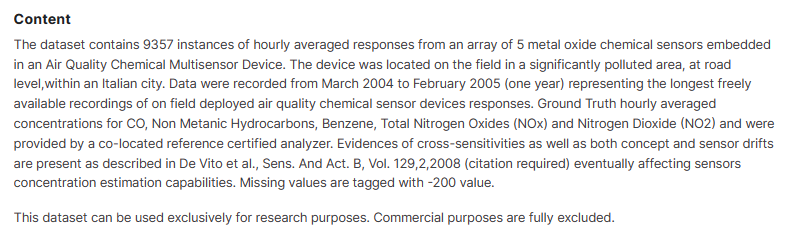

## **BASIC EDA**

In [2]:
# reading the dataset
df = pd.read_csv('/kaggle/input/air-quality-data-set/AirQuality.csv')
df.head()

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;


INFERENCES:
* Dataset is very much distorted when read using the comma delimiter.
* Values are separated using ';' instead of ','
* Another thing to notice is that there some instances where values are separated. Definitely, comma is used at some placed to denote decimal.

In [3]:
# since the dataset has been delimited by ';', we need to change the delimiter to ';' instead ',' and decimals are represented by commas
df = pd.read_csv('/kaggle/input/air-quality-data-set/AirQuality.csv',sep=";", decimal=",",header=0)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# shape of our dataset
# df.shape
print("No of rows in dataset:",df.shape[0])
print("No of columns in dataset:",df.shape[1])

No of rows in dataset: 9471
No of columns in dataset: 17


In [5]:
# getting the names of the columns
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [6]:
# getting the dtypes of the all columns
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [7]:
# getting the numerical estimates of all the numerical column
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


## **Handling Null Values**

In [9]:
# checking null values in our dataset
df.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

**INFERENCE:**
* Each column have 114 values missing but we are not sure whether full 114 rows are empty or not. 
* There are two unnamed columns which are fully empty.

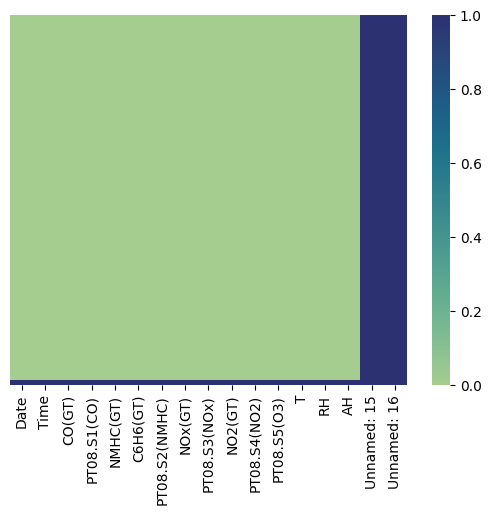

In [10]:
# visualizing the na values using heatmap
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')
plt.show()

**INFERENCE: Last 114 rows in each column are empty.**

In [11]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# dropping the last two columns 
# assigning inplace argument as True which we result in completly dropping off of the last two columns
df.drop(columns=['Unnamed: 15', 'Unnamed: 16'],inplace=True)

In [13]:
# remaining columns
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

**Last two empty columns have been dropped permanently!**

In [14]:
# dropping the last 114 rows which are fully empty
df.dropna(inplace=True)

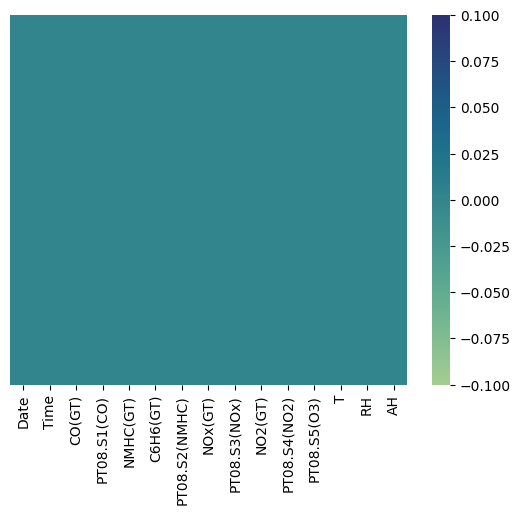

In [15]:
# no null values are now present in the dataset which was provided
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')
plt.show()

**But the description of dataset says that the null values are labelled with -200 value in the dataset**

In [16]:
#first labelling -200 value as null value
df.replace(to_replace=-200,value=np.nan,inplace=True)

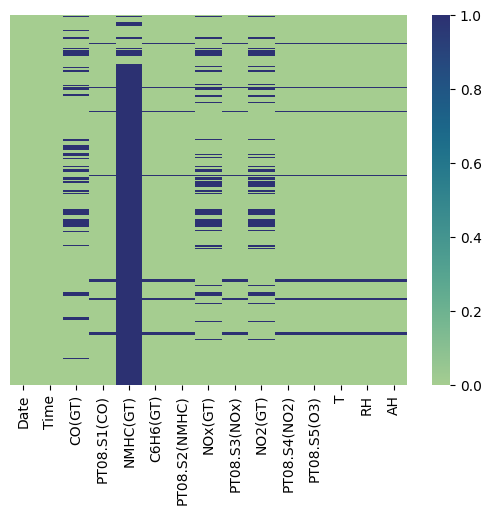

In [17]:
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')
plt.show()

NMHC column has a lot of null values. We can drop the column!

In [18]:
df.drop(columns=['NMHC(GT)'],inplace=True)

In [19]:
df.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [20]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

**INFERENCE: Columns which are having null values except column Date and Time**

In [21]:
# getting the datatypes of all the columns having null values
# first storing all the column names in a list having null values
col = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH']
df = df[col]
df[col].dtypes

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [22]:
df[col].head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Since the data is real valued, we should replace all the null values with mean of each column

In [23]:
for i in col:
    df[i] = df[i].fillna(df[i].mean())

In [24]:
df.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

**NULL values are now handled!!**

## **Handling Outliers**

* Outliers are extreme values that stand out greatly from the overall pattern of values in a dataset.
* It is necessary to handle outliers because they affect the model's distribution and ultimately the model's accuracy.
* We can use boxplot to get an idea of the outliers present in the dataset.
* The box represents the interquartile range (IQR), with the median indicated by a line inside the box.
* Any points outside the whiskers are considered potential outliers.

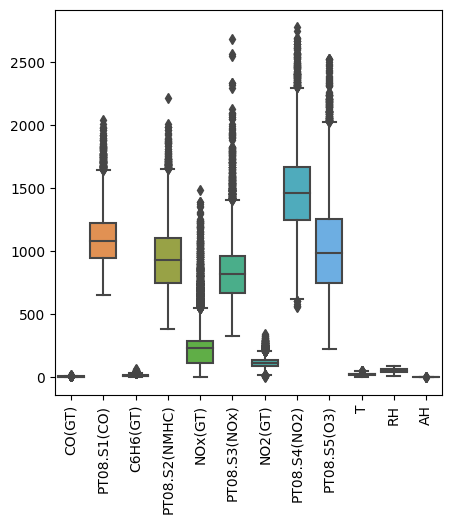

In [25]:
# plotting a boxplot
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()

INFERENCES:
* As we can notice that there are a lot of data points which lies outside the whiskers.
* Let's get a count of the outliers present in each column.<br>
reference: [link](https://stackoverflow.com/questions/39068214/how-to-count-outliers-for-all-columns-in-python)

In [26]:
# getting the quartile one and quartile 3 values of each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# finally calculating the interquartile range IQR
IQR = Q3 - Q1

In [27]:
# if the values fall behind Q1 - (1.5 * IQR) or above Q3 + 1.5*IQR,
#then it is been defined as outlier
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

CO(GT)           454
PT08.S1(CO)      145
C6H6(GT)         286
PT08.S2(NMHC)     91
NOx(GT)          778
PT08.S3(NOx)     278
NO2(GT)          380
PT08.S4(NO2)     131
PT08.S5(O3)      131
T                 10
RH                 0
AH                 7
dtype: int64

**To handle outliers we can follow three steps:**
1. Trimming or removing outliers permanently.<br>
2. Quantile based flooring and capping.<br>
3. Replacing them with mean and median.<br>

**Our approach:**
- Trimming and removing outliers won't help much and may also results in data loss.
- Quantile based flooring and capping refer to replacing outliers with 10% and 90% quantile value.
- As mean value is highly influenced by the outliers, it been advised to use median to replace the outliers.

Reference: [click here](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)

In [28]:
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
mask

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,False,False,False,False,False,False,False,False,False,False,False,False
9353,False,False,False,False,False,False,False,False,False,False,False,False
9354,False,False,False,False,False,False,False,False,False,False,False,False
9355,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
# now replacing all the outliers using the median of that particular column
for i in mask.columns:
    df[i].astype('float')
    temp = df[i].median()
    df.loc[mask[i], i] = temp

In [30]:
# outliers are now being handled and are replaced with that column's median value
((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

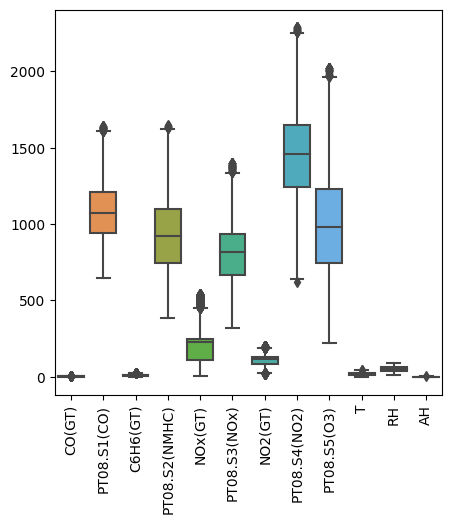

In [31]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()

## **Converting Categorical Features to Numerical**

In [32]:
df.head(20)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.60000,1360.0,11.9,1046.0,166.000000,1056.0,113.000000,1692.0,1268.0,13.6,48.9,0.7578
1,2.00000,1292.0,9.4,955.0,103.000000,1174.0,92.000000,1559.0,972.0,13.3,47.7,0.7255
2,2.20000,1402.0,9.0,939.0,131.000000,1140.0,114.000000,1555.0,1074.0,11.9,54.0,0.7502
3,2.20000,1376.0,9.2,948.0,172.000000,1092.0,122.000000,1584.0,1203.0,11.0,60.0,0.7867
4,1.60000,1272.0,6.5,836.0,131.000000,1205.0,116.000000,1490.0,1110.0,11.2,59.6,0.7888
5,1.20000,1197.0,4.7,750.0,89.000000,1337.0,96.000000,1393.0,949.0,11.2,59.2,0.7848
6,1.20000,1185.0,3.6,690.0,62.000000,818.0,77.000000,1333.0,733.0,11.3,56.8,0.7603
7,1.00000,1136.0,3.3,672.0,62.000000,818.0,76.000000,1333.0,730.0,10.7,60.0,0.7702
8,0.90000,1094.0,2.3,609.0,45.000000,818.0,60.000000,1276.0,620.0,10.7,59.7,0.7648
9,0.60000,1010.0,1.7,561.0,246.896735,818.0,113.091251,1235.0,501.0,10.3,60.2,0.7517


In [33]:
df.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

**INFERENCE: There are not categorical columns**

## **Find correlations between attributes**

In [34]:
# using pearson's correlation to find the correlation between all the features
df.corr()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.685078,0.740949,0.717894,0.560216,-0.593482,0.568398,0.483957,0.668803,0.069788,-0.009705,0.051802
PT08.S1(CO),0.685078,1.000000,0.811695,0.853090,0.466673,-0.755626,0.515980,0.620339,0.851312,0.057536,0.103985,0.133650
C6H6(GT),0.740949,0.811695,1.000000,0.912236,0.450179,-0.712747,0.507309,0.691500,0.788554,0.232110,-0.108150,0.156286
PT08.S2(NMHC),0.717894,0.853090,0.912236,1.000000,0.467958,-0.768591,0.533579,0.727713,0.842632,0.251209,-0.106561,0.182036
NOx(GT),0.560216,0.466673,0.450179,0.467958,1.000000,-0.529675,0.677128,0.082173,0.543215,-0.189059,0.135411,-0.109367
PT08.S3(NOx),-0.593482,-0.755626,-0.712747,-0.768591,-0.529675,1.000000,-0.513462,-0.482471,-0.772358,-0.088810,-0.085665,-0.194880
NO2(GT),0.568398,0.515980,0.507309,0.533579,0.677128,-0.513462,1.000000,0.128650,0.561490,-0.108261,-0.109464,-0.249036
PT08.S4(NO2),0.483957,0.620339,0.691500,0.727713,0.082173,-0.482471,0.128650,1.000000,0.539569,0.581921,-0.047436,0.635000
PT08.S5(O3),0.668803,0.851312,0.788554,0.842632,0.543215,-0.772358,0.561490,0.539569,1.000000,-0.008959,0.120387,0.089491
T,0.069788,0.057536,0.232110,0.251209,-0.189059,-0.088810,-0.108261,0.581921,-0.008959,1.000000,-0.574588,0.658601


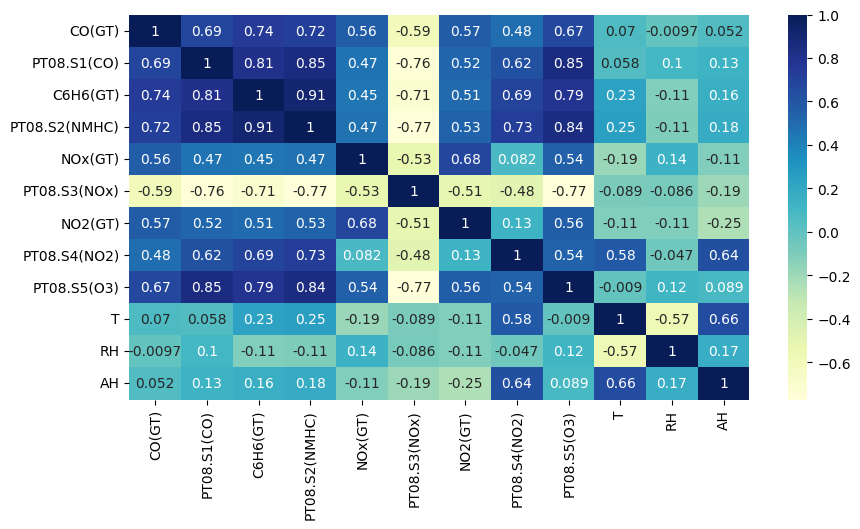

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()

**According to Pearson's correlation, 0 correlation represents no relation. Positive and Negative correlation depicts that there exists some relation.**

- Column such as T, RH, AH do not have strong correlation with other features.
- NO2(GT) and NOx(GT) are having correlation with other features but not that much strong as compared to CO(GT), C6H6(GT) and Columns with PT.
- CO(GT) and C6H6(GT) must be the columns which are correlated with all other features and must be the target

## **ML Problem (Regression)**

Since the values are real, it is definitely a regression problem. C6H6 and CO both are the tentative target variables.

In [36]:
def solve(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1)
    # using linear regression
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R2_score of Linear Regression:",r2_score(y_test,y_pred))

    model = Lasso(alpha=0.1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R2_score of Lasso Regression:",r2_score(y_test,y_pred))

    model = Ridge(alpha=0.1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R2_score of Ridge Regression:",r2_score(y_test,y_pred))

In [37]:
# choosing C6H6 as the target variable and other float dtype features as independed features
X = df[['CO(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)']]
y = df['C6H6(GT)']

In [38]:
solve(X,y)

R2_score of Linear Regression: 0.8515116616599925
R2_score of Lasso Regression: 0.850955652815017
R2_score of Ridge Regression: 0.8515116900760945


In [39]:
# now selecting CO(GT) as the target variables and other float dtype features as independent features
X = df[['C6H6(GT)','PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)']]
y = df['CO(GT)']

In [40]:
solve(X,y)

R2_score of Linear Regression: 0.6368494897082215
R2_score of Lasso Regression: 0.6356957346228977
R2_score of Ridge Regression: 0.636849496505258


**C6H6 can be finalized as the target variable now because r2score for CO(GT) as target variable is less as compared to the r2_score for the C6H6(GT)!**